In [1]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.manifold import TSNE


In [2]:
# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [3]:
# Exploratory analysis
# Check for missing values

print(penguins_df.isna().sum())

# Check columns types
print(penguins_df.info())

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


In [4]:
# Convert the sex columns to binary 0-1

penguins_df['sex_numeric'] = np.where(penguins_df['sex']=='MALE',0,1)
    
print(penguins_df['sex_numeric'].head())

0    0
1    1
2    1
3    1
4    0
Name: sex_numeric, dtype: int64


In [5]:
# Convert the df into an array

penguins_array = penguins_df.drop('sex',axis=1).values
print(penguins_array[0:5])


[[3.91e+01 1.87e+01 1.81e+02 3.75e+03 0.00e+00]
 [3.95e+01 1.74e+01 1.86e+02 3.80e+03 1.00e+00]
 [4.03e+01 1.80e+01 1.95e+02 3.25e+03 1.00e+00]
 [3.67e+01 1.93e+01 1.93e+02 3.45e+03 1.00e+00]
 [3.93e+01 2.06e+01 1.90e+02 3.65e+03 0.00e+00]]


In [6]:
# scale the model
scaler = StandardScaler()
scaler.fit(penguins_array)
StandardScaler(copy=True, with_mean=True, with_std = True)
model_scaled = scaler.transform(penguins_array)

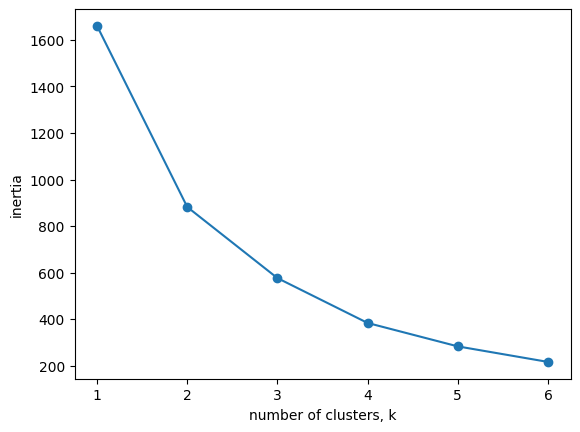

In [8]:
# Examine what n_clusters to choose

ks = range(1,7)
inertias = []

for k in ks:
    kmenask = KMeans(n_clusters = k, n_init=10)
    kmenask.fit_transform(model_scaled)
    inertias.append(kmenask.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# The interias examination shows that the n_clusters is 4

In [10]:
# Making the KMeans model with n_clusters = 4
kmeans = KMeans(n_clusters = 4, n_init=10)
kmeans.fit(model_scaled) 
species = kmeans.predict(model_scaled)
print(species)
print(kmeans.inertia_)

[2 0 0 0 2 0 2 0 2 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0
 2 0 2 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 2 0 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2 2
 0 2 0 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2
 2 0 2 0 0 2 0 2 2 0 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 2 0 1 3 1 3 3 1 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 3 1 1 3 1 3 3 1 3 3 1 1 3 1 3 1 3 1 3 1 3 1 3 3 1 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 3 1 3 1 3 3 1 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 3 1 1 3 1 3 1 3 3 1 3 1 3 1 3 1 3 1 3 3 1 1 3 1 3]
383.4643203353644


In [ ]:
# Plot a dendogram

from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage: mergings
mergings = linkage(model_scaled,method = 'single')

# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=3
          )

plt.show()

# Via the dendogram I see that there should be 4 clusters

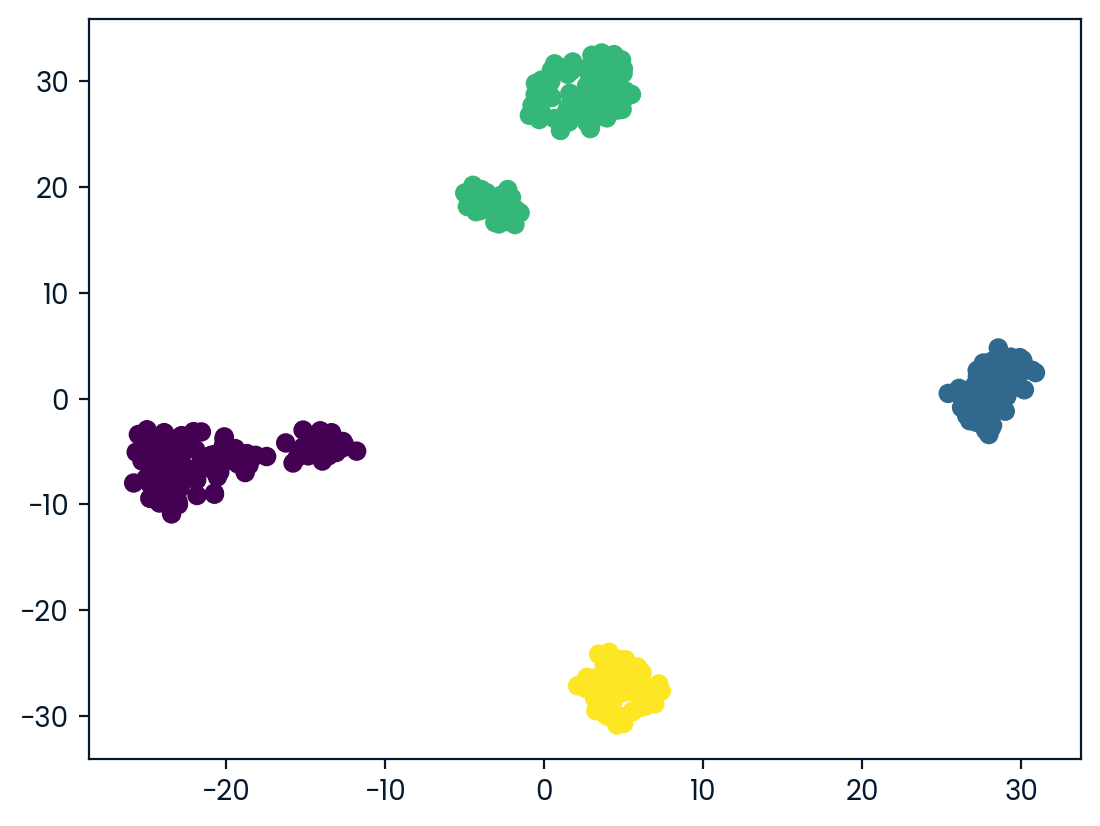

In [78]:
# Display a t-sne graph to show the clusters

model_tsne = TSNE(learning_rate=100)
transformed_tsne = model_tsne.fit_transform(model_scaled)
xs_tsne = transformed_tsne[:,0]
ys_tsne = transformed_tsne[:,1]
plt.scatter(xs_tsne,ys_tsne, c= species)
plt.show()


In [79]:
# Create a dataframe with the penguines array and the clusters
stats = penguins_df.drop('sex',axis=1)
stats['species'] = species
print(stats.head())

# Group by specie
stat_penguins = stats.groupby('species').mean()
print(stat_penguins)
print(stat_penguins.shape)

   culmen_length_mm  culmen_depth_mm  ...  sex_numeric  species
0              39.1             18.7  ...            0        2
1              39.5             17.4  ...            1        0
2              40.3             18.0  ...            1        0
3              36.7             19.3  ...            1        0
4              39.3             20.6  ...            0        2

[5 rows x 6 columns]
         culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_numeric
species                                     ...                          
0               40.217757        17.611215  ...  3419.158879          1.0
1               49.473770        15.718033  ...  5484.836066          0.0
2               43.878302        19.111321  ...  4006.603774          0.0
3               45.563793        14.237931  ...  4679.741379          1.0

[4 rows x 5 columns]
(4, 5)
